## Feature Engineering for Energy Consumption Forecasting

- In this notebook, I will create new features to enhance the predictive power of our energy consumption forecasting models.  
- Feature engineering involves transforming raw data into meaningful inputs that help machine learning algorithms capture patterns, trends, and seasonality.  
- I will extract time-based features, generate lagged variables, rolling statistics, and other relevant attributes to improve model accuracy and performance.

In [1]:
import pandas as pd

In [2]:
## accessing the data
df_cleaned = pd.read_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned.parquet")

In [3]:
df_cleaned.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-04-01 02:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-04-01 04:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-04-01 05:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-04-01 06:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-04-01 07:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0


In [4]:
df_cleaned.shape

(162080, 12)

In [5]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

##### Extracting time-based feature

In [8]:
## extracting time-based features
df_cleaned['hour'] = df_cleaned.index.hour
df_cleaned['day_of_week'] = df_cleaned.index.dayofweek
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['day_of_year'] = df_cleaned.index.dayofyear
df_cleaned['is_weekend'] = (df_cleaned.index.dayofweek >= 5).astype(int)

In [9]:
assert isinstance(df_cleaned.index, pd.DatetimeIndex)

In [10]:
print(df_cleaned[['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend']].head())


                           hour  day_of_week  month  day_of_year  is_weekend
Datetime                                                                    
1998-04-01 02:00:00+00:00     2            2      4           91           0
1998-04-01 04:00:00+00:00     4            2      4           91           0
1998-04-01 05:00:00+00:00     5            2      4           91           0
1998-04-01 06:00:00+00:00     6            2      4           91           0
1998-04-01 07:00:00+00:00     7            2      4           91           0


##### Lag Feature  
A lag feature is a past value of a variable used as a predictor for future values.  
Think of it as teaching our model:  
“What happened 1 hour/day/week ago might help predict what happens now or next.”

In [11]:
core_cols = ['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 
             'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load']

for col in core_cols:
    # Add lag features
    df_cleaned[f'{col}_lag_1'] = df_cleaned[col].shift(1)
    df_cleaned[f'{col}_lag_24'] = df_cleaned[col].shift(24)    
    # Add rolling features
    df_cleaned[f'{col}_rolling_mean_24'] = df_cleaned[col].rolling(window=24).mean()
    df_cleaned[f'{col}_rolling_std_24'] = df_cleaned[col].rolling(window=24).std()
    df_cleaned[f'{col}_rolling_mean_168'] = df_cleaned[col].rolling(168).mean() # Last 7 days
    df_cleaned[f'{col}_rolling_std_168'] = df_cleaned[col].rolling(168).std()

##### Holiday Indicators
This feature allows the model to distinguish between regular and holiday days, improving its ability to capture sudden shifts in demand and enhancing forecast accuracy.  

In [12]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df_cleaned.index.min(), end=df_cleaned.index.max())

df_cleaned['is_holiday'] = df_cleaned.index.isin(holidays).astype(int)

In [13]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load', 'hour', 'day_of_week', 'month',
       'day_of_year', 'is_weekend', 'AEP_lag_1', 'AEP_lag_24',
       'AEP_rolling_mean_24', 'AEP_rolling_std_24', 'AEP_rolling_mean_168',
       'AEP_rolling_std_168', 'COMED_lag_1', 'COMED_lag_24',
       'COMED_rolling_mean_24', 'COMED_rolling_std_24',
       'COMED_rolling_mean_168', 'COMED_rolling_std_168', 'DAYTON_lag_1',
       'DAYTON_lag_24', 'DAYTON_rolling_mean_24', 'DAYTON_rolling_std_24',
       'DAYTON_rolling_mean_168', 'DAYTON_rolling_std_168', 'DEOK_lag_1',
       'DEOK_lag_24', 'DEOK_rolling_mean_24', 'DEOK_rolling_std_24',
       'DEOK_rolling_mean_168', 'DEOK_rolling_std_168', 'DOM_lag_1',
       'DOM_lag_24', 'DOM_rolling_mean_24', 'DOM_rolling_std_24',
       'DOM_rolling_mean_168', 'DOM_rolling_std_168', 'DUQ_lag_1',
       'DUQ_lag_24', 'DUQ_rolling_mean_24', 'DUQ_rolling_std_24',
       'DUQ_rolling_mean_168', 'DUQ_rollin

In [14]:
## checking for null values
print(df_cleaned.isnull().sum().sum())

4860


In [15]:
## dropping the null values
df_cleaned.dropna(inplace=True)

In [17]:
## checking for null values
print(df_cleaned.isnull().sum().sum())

0


In [16]:
df_cleaned.corr()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,PJMW_rolling_std_24,PJMW_rolling_mean_168,PJMW_rolling_std_168,PJM_Load_lag_1,PJM_Load_lag_24,PJM_Load_rolling_mean_24,PJM_Load_rolling_std_24,PJM_Load_rolling_mean_168,PJM_Load_rolling_std_168,is_holiday
AEP,1.000000,0.467325,0.944340,NaN,0.815172,0.878650,0.248378,0.384122,0.539265,0.761519,...,0.265714,0.444222,0.271623,NaN,NaN,NaN,NaN,NaN,NaN,-0.011929
COMED,0.467325,1.000000,0.511225,NaN,0.516906,0.552846,-0.106628,0.781635,-0.088517,0.419977,...,0.206458,0.220317,0.210603,NaN,NaN,NaN,NaN,NaN,NaN,-0.003249
DAYTON,0.944340,0.511225,1.000000,NaN,0.791401,0.898390,0.109643,0.469324,0.554107,0.760860,...,0.397500,0.388681,0.387654,NaN,NaN,NaN,NaN,NaN,NaN,-0.014227
DEOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOM,0.815172,0.516906,0.791401,NaN,1.000000,0.836976,0.072520,0.493776,0.363117,0.787446,...,0.358491,0.389566,0.358945,NaN,NaN,NaN,NaN,NaN,NaN,-0.008778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PJM_Load_rolling_mean_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJM_Load_rolling_std_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJM_Load_rolling_mean_168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJM_Load_rolling_std_168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


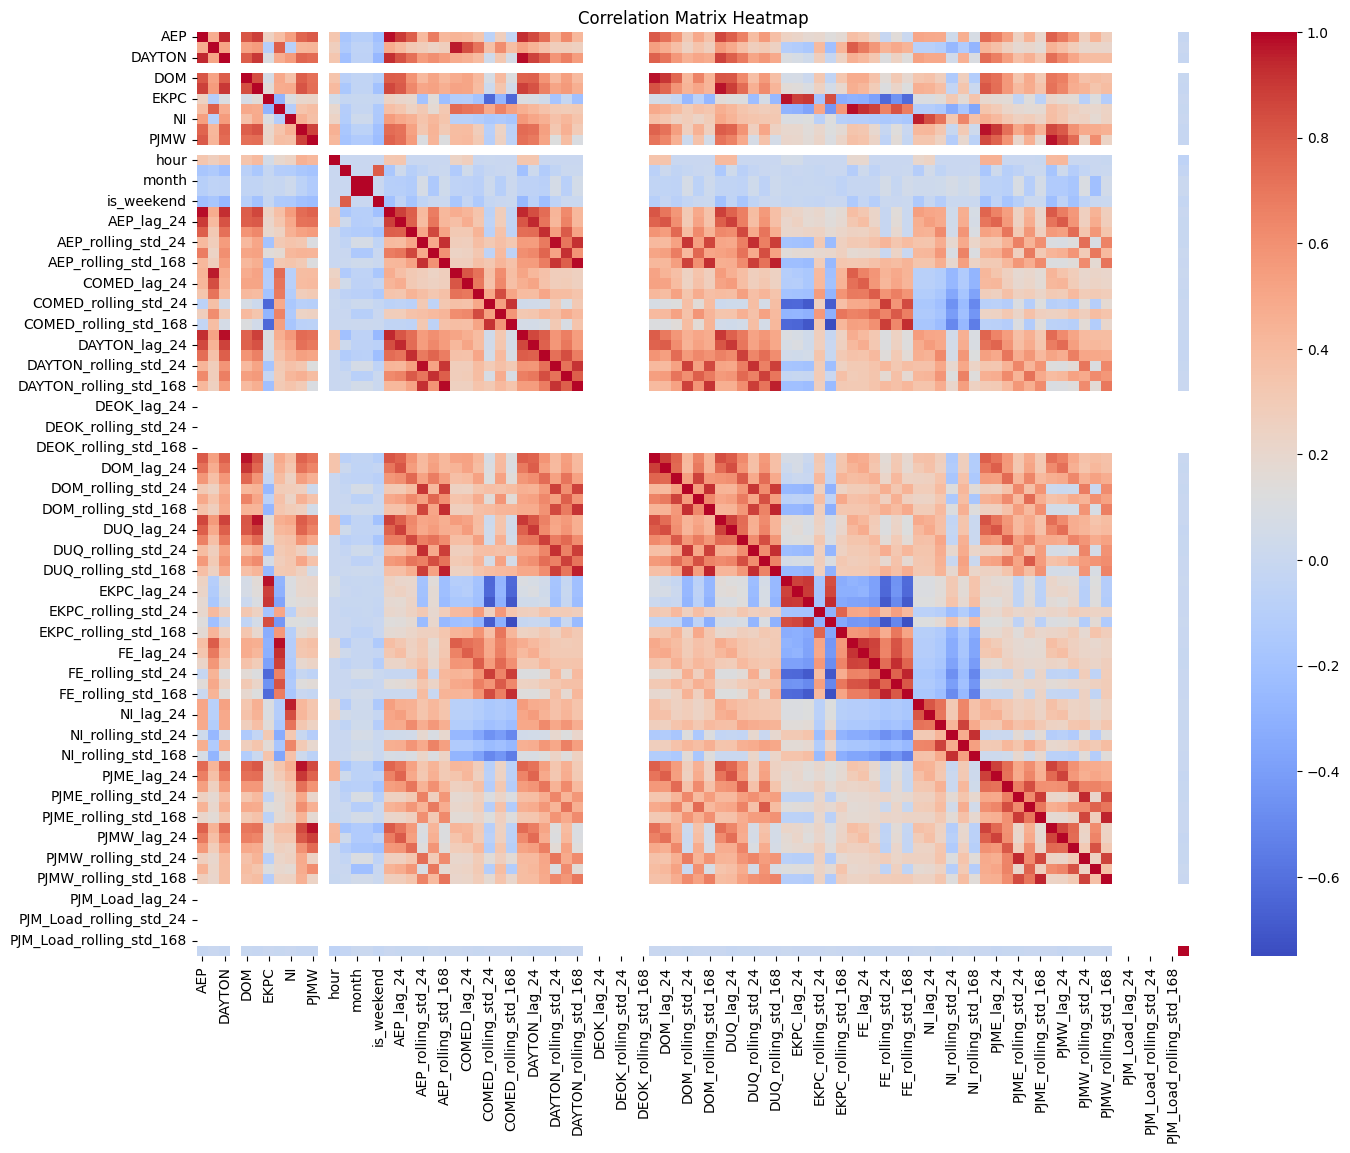

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
## saving the cleaned data with new features
df_cleaned.to_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned_with_features.parquet")

: 